In [3]:
import numpy as np
import pandas as pd
import seaborn as sbn
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Skewness: 0.000000
Kurtosis: -1.200000
Shapiro_Test: 0.954798
Shapiro_Test: 0.000000


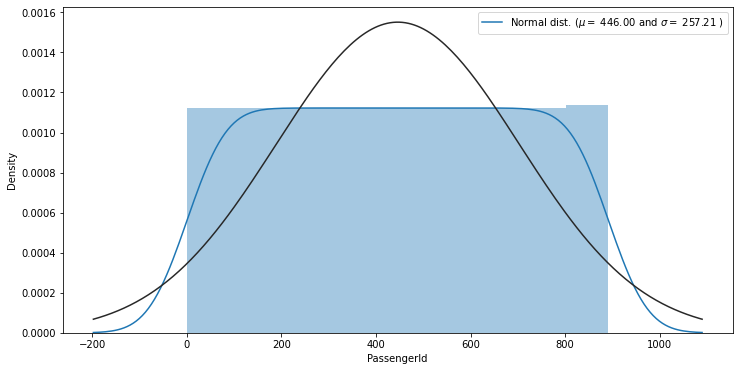

Skewness: 0.478523
Kurtosis: -1.775005
Shapiro_Test: 0.616660
Shapiro_Test: 0.000000


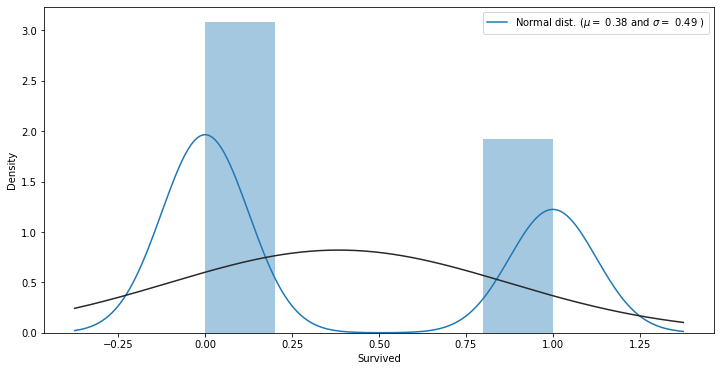

Skewness: -0.630548
Kurtosis: -1.280015
Shapiro_Test: 0.718338
Shapiro_Test: 0.000000


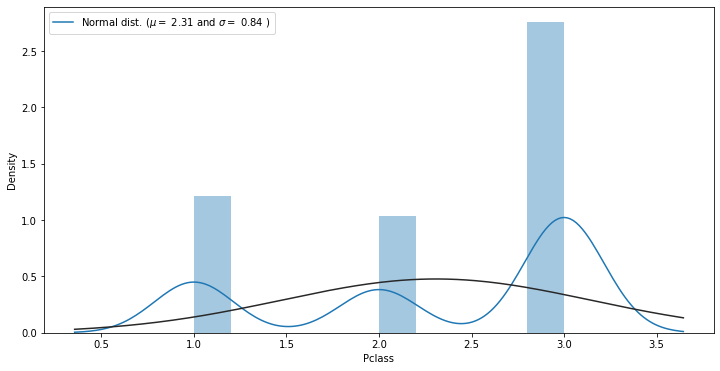

Error:  Name
Error:  Sex
Error:  Age
Skewness: 3.695352
Kurtosis: 17.880420
Shapiro_Test: 0.512966
Shapiro_Test: 0.000000


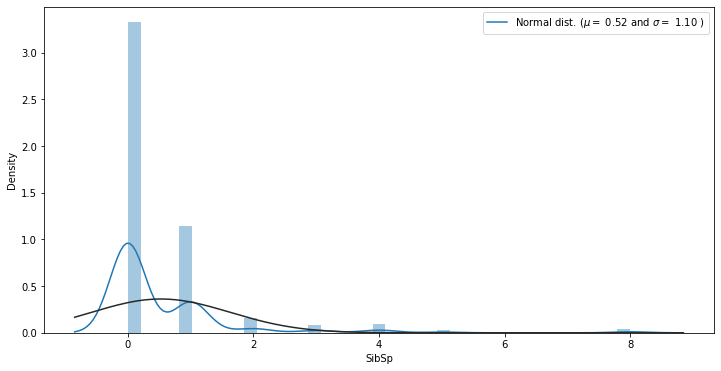

Skewness: 2.749117
Kurtosis: 9.778125
Shapiro_Test: 0.532815
Shapiro_Test: 0.000000


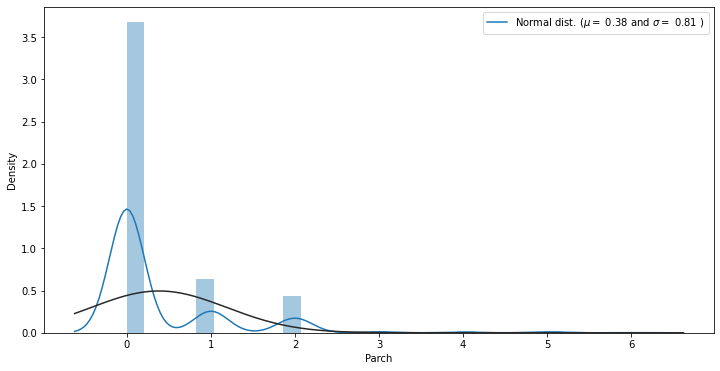

Error:  Ticket
Skewness: 4.787317
Kurtosis: 33.398141
Shapiro_Test: 0.521891
Shapiro_Test: 0.000000


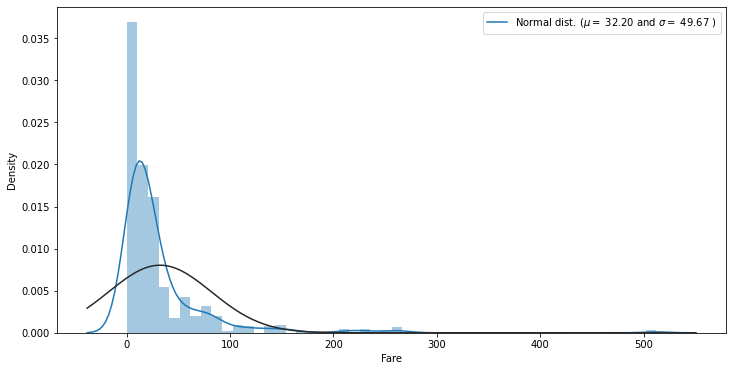

Error:  Cabin
Error:  Embarked


In [5]:
for i in df.columns:
    try:
        (mu, sigma) = norm.fit(df[i])
        plt.figure(figsize = (12,6))
        sbn.distplot(df[i], kde = True, hist=True, fit = norm)
        plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                    loc='best')
        shap_t,shap_p = stats.shapiro(df[i])

        print("Skewness: %f" % abs(df[i]).skew())
        print("Kurtosis: %f" % abs(df[i]).kurt())
        print("Shapiro_Test: %f" % shap_t)
        print("Shapiro_Test: %f" % shap_p)
        plt.show()
    except:
        print('Error: ',i)

In [10]:
thresH=40

nan = pd.DataFrame(df.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/df.shape[0])*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > thresH, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc(%),Usability
Embarked,2,Embarked,0.224467,Keep
Age,177,Age,19.865320,Keep
Cabin,687,Cabin,77.104377,Discard


891